In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Project - Stock Market Analysis


# 1. The change in price of the stock overtime

Handle requesting stock information with pandas, and analyze basic attributes of a stock.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr# For time stamps
from datetime import datetime

# For time stamps
from datetime import datetime

In [ ]:
# Read datasets
FPT = pd.read_csv("/content/drive/MyDrive/Project/FPT.csv")
MSN = pd.read_csv("/content/drive/MyDrive/Project/MSN.csv")
PNJ = pd.read_csv("/content/drive/MyDrive/Project/PNJ.csv")
VIC = pd.read_csv("/content/drive/MyDrive/Project/VIC.csv")

In [ ]:
# Combine datasets
df = pd.concat([FPT, MSN, PNJ, VIC], ignore_index=True)

In [ ]:
# Display df affter combining
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
459330,VIC,12/22/2020 14:22,105.80,105.80,105.70,105.70,1870,0
459331,VIC,12/22/2020 14:23,105.70,105.70,105.70,105.70,2510,0
459332,VIC,12/22/2020 14:24,105.70,105.70,105.70,105.70,3620,0
459333,VIC,12/22/2020 14:25,105.70,105.70,105.70,105.70,100,0


## Descriptive Statistics about the Data

In [ ]:
#Describe FPT dataset
FPT.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [ ]:
#Describe MSN dataset
MSN.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [ ]:
#Describe PNJ dataset
PNJ.describe()

,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [ ]:
#Describe VIC dataset
VIC.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


In [ ]:
#Describe combined dataset
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,459335.000000,459335.000000,459335.000000,459335.000000,4.593350e+05,459335.0
mean,74.545826,74.626579,74.481065,74.546183,4.909390e+03,0.0
std,23.023346,23.038201,23.011619,23.024380,1.902104e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+00,0.0
25%,54.190000,54.250000,54.150000,54.190000,3.600000e+02,0.0
50%,75.730000,75.920000,75.600000,75.720000,1.500000e+03,0.0
75%,90.100000,90.200000,90.000000,90.100000,4.920000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,3.300680e+06,0.0


# Data Information

In [ ]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         459335 non-null  object 
 1   Date/Time      459335 non-null  object 
 2   Open           459335 non-null  float64
 3   High           459335 non-null  float64
 4   Low            459335 non-null  float64
 5   Close          459335 non-null  float64
 6   Volume         459335 non-null  int64  
 7   Open Interest  459335 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 28.0+ MB


## Closing Price

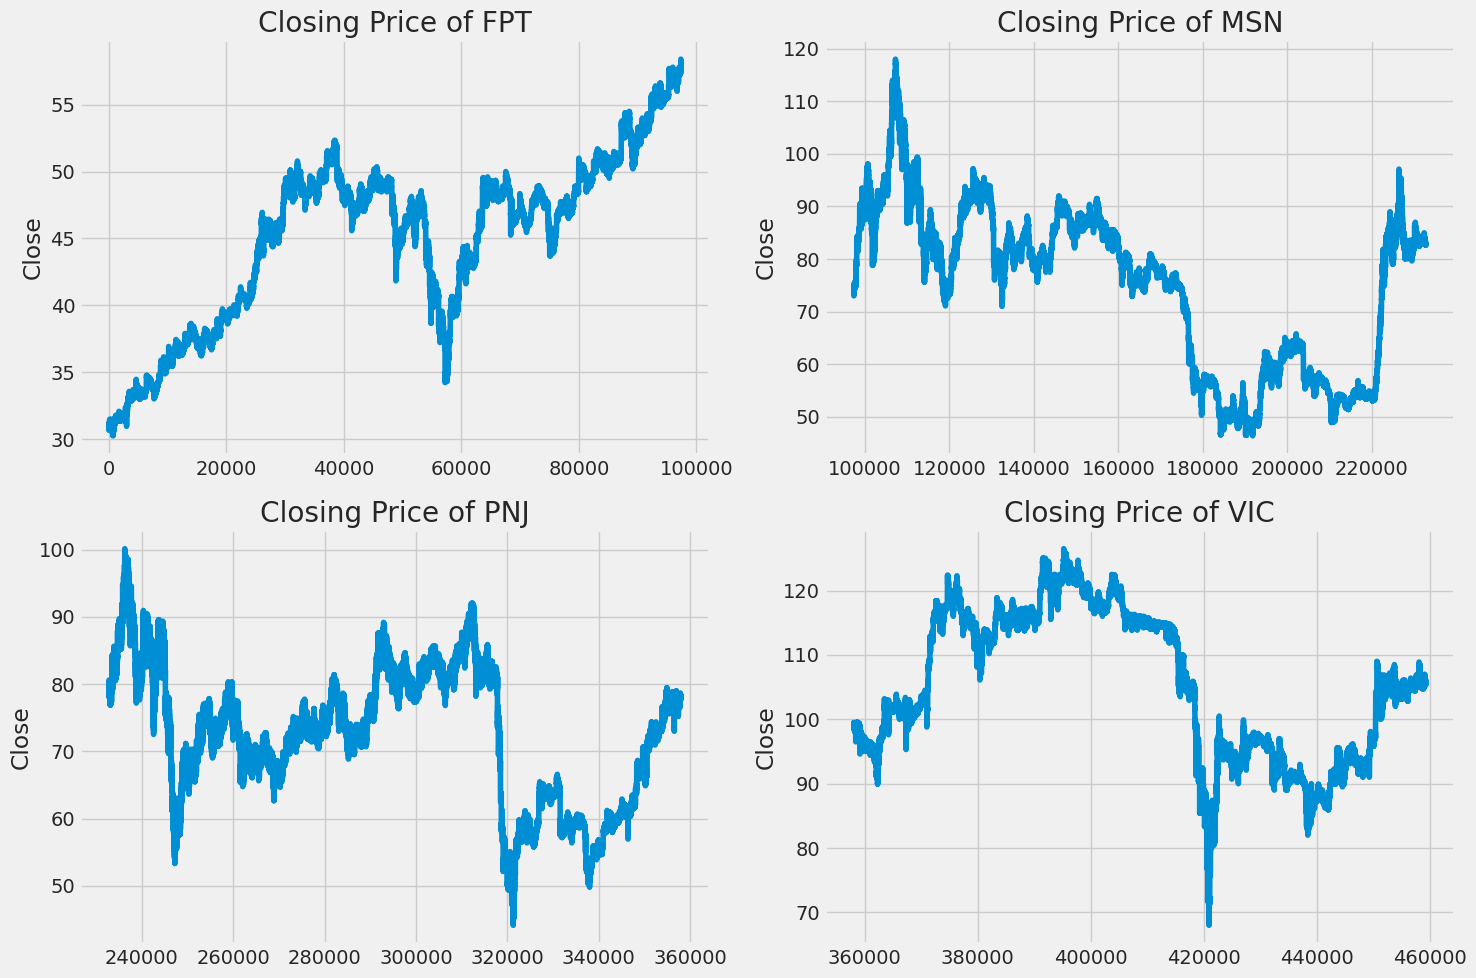

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

company_list = [FPT, MSN, PNJ, VIC]
tech_list = ['FPT', 'MSN', 'PNJ', 'VIC']

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    df[df['Ticker'] == tech_list[i - 1]]['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

## Volume of Sales


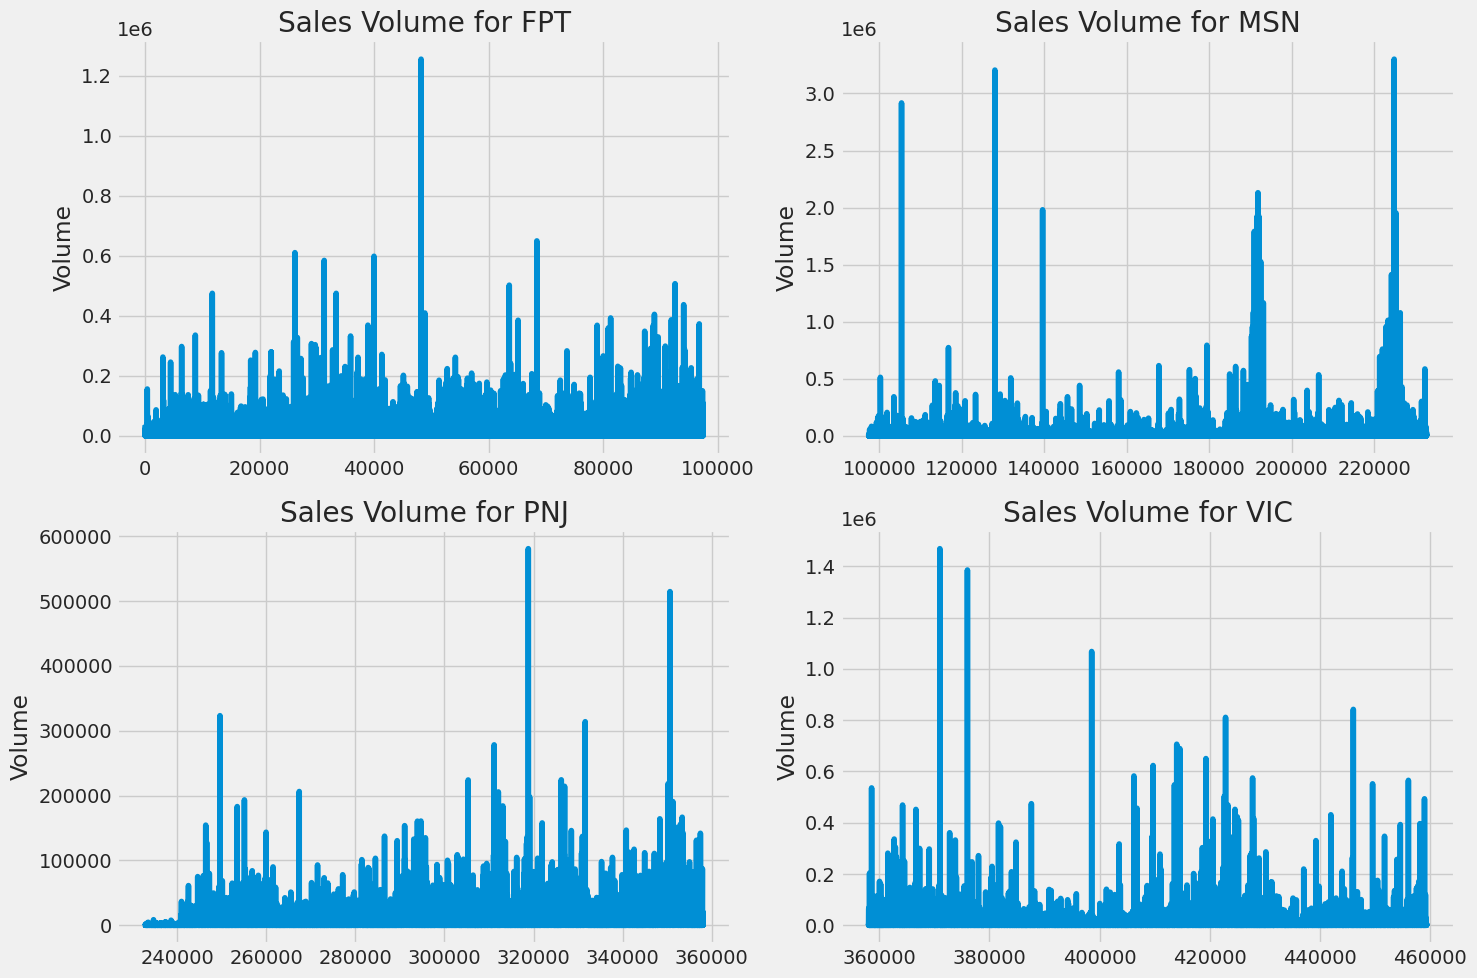

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    df[df['Ticker'] == tech_list[i - 1]]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

I just showed the visualizations for the closing price and the volume traded each day, let's caculate the moving average for the stock.

# 2.The moving average of the various stocks

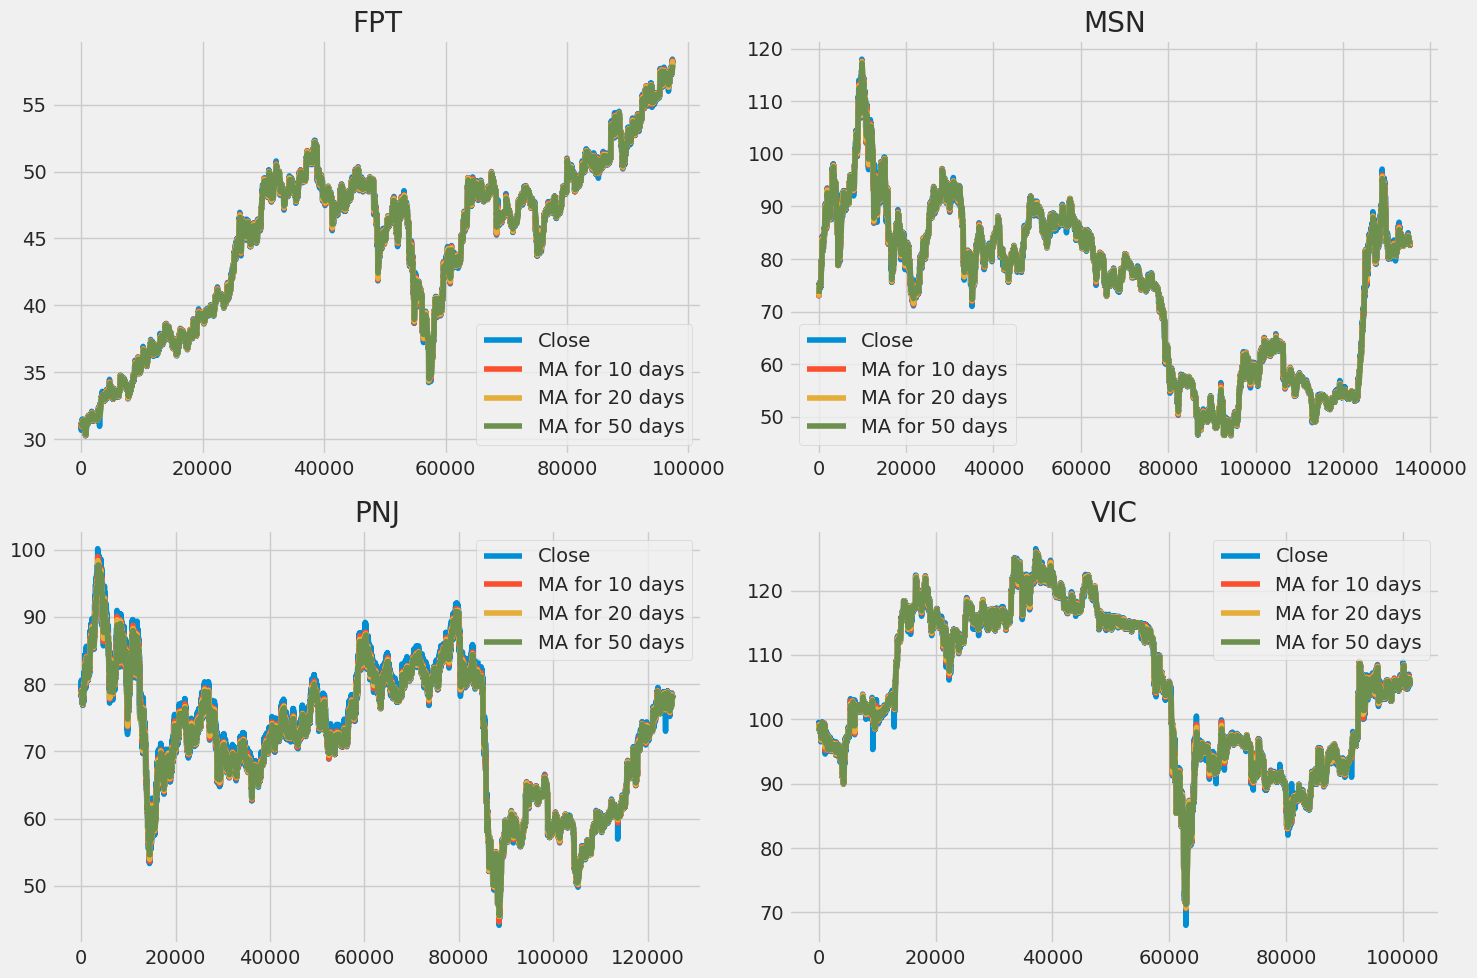

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

FPT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FPT')

MSN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MSN')

PNJ[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('PNJ')

VIC[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('VIC')

fig.tight_layout()

# 3. The daily return of the stock on average

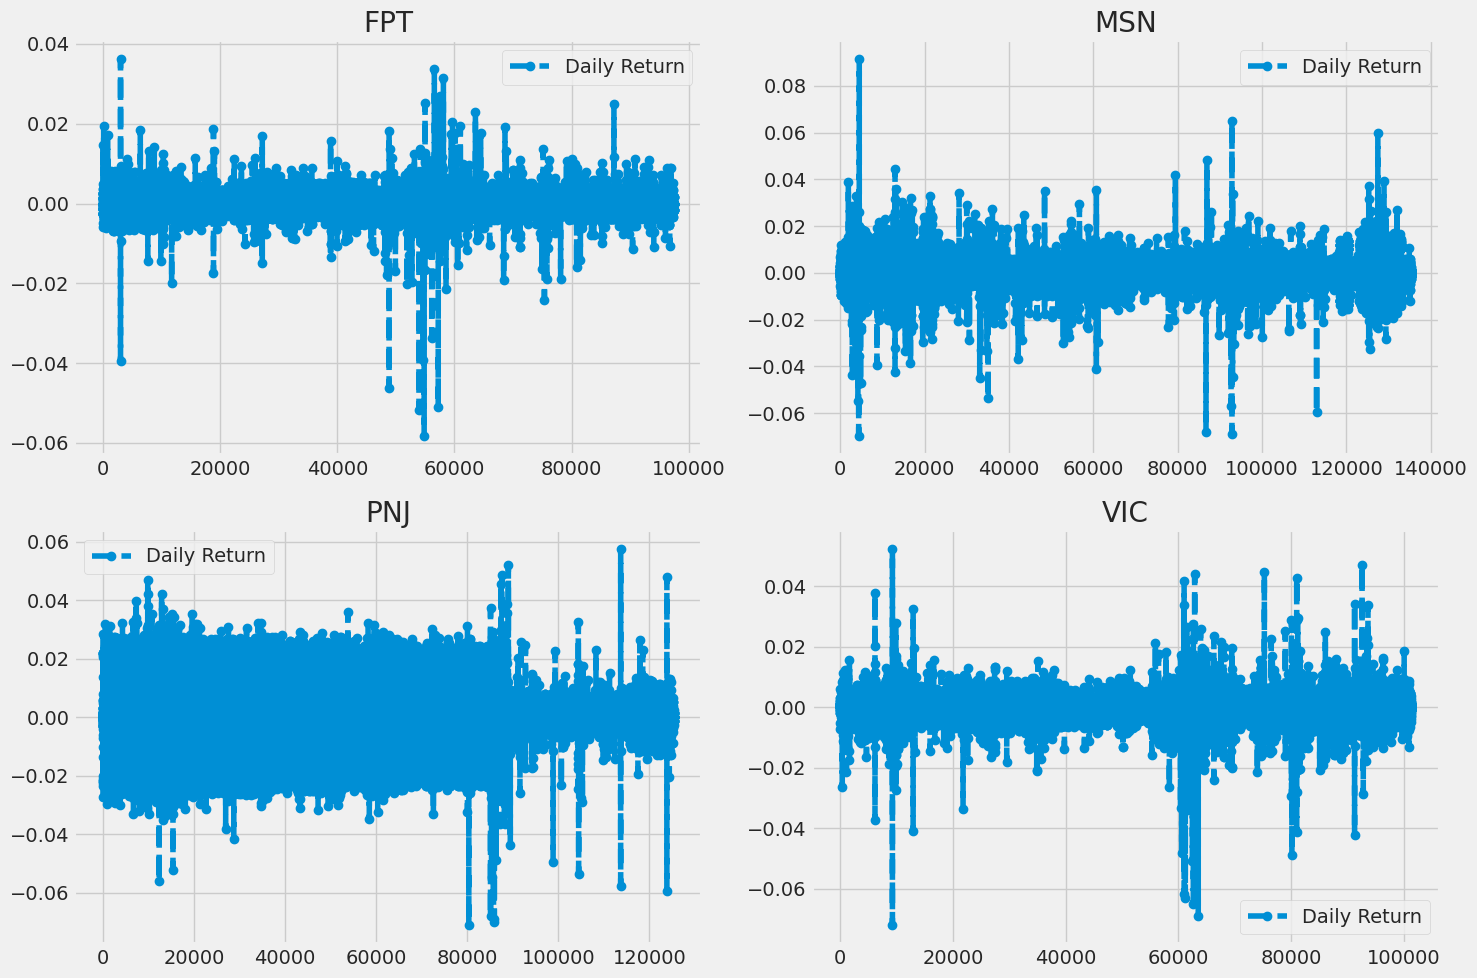

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

FPT['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FPT')

MSN['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MSN')

PNJ['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('PNJ')

VIC['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('VIC')

fig.tight_layout()

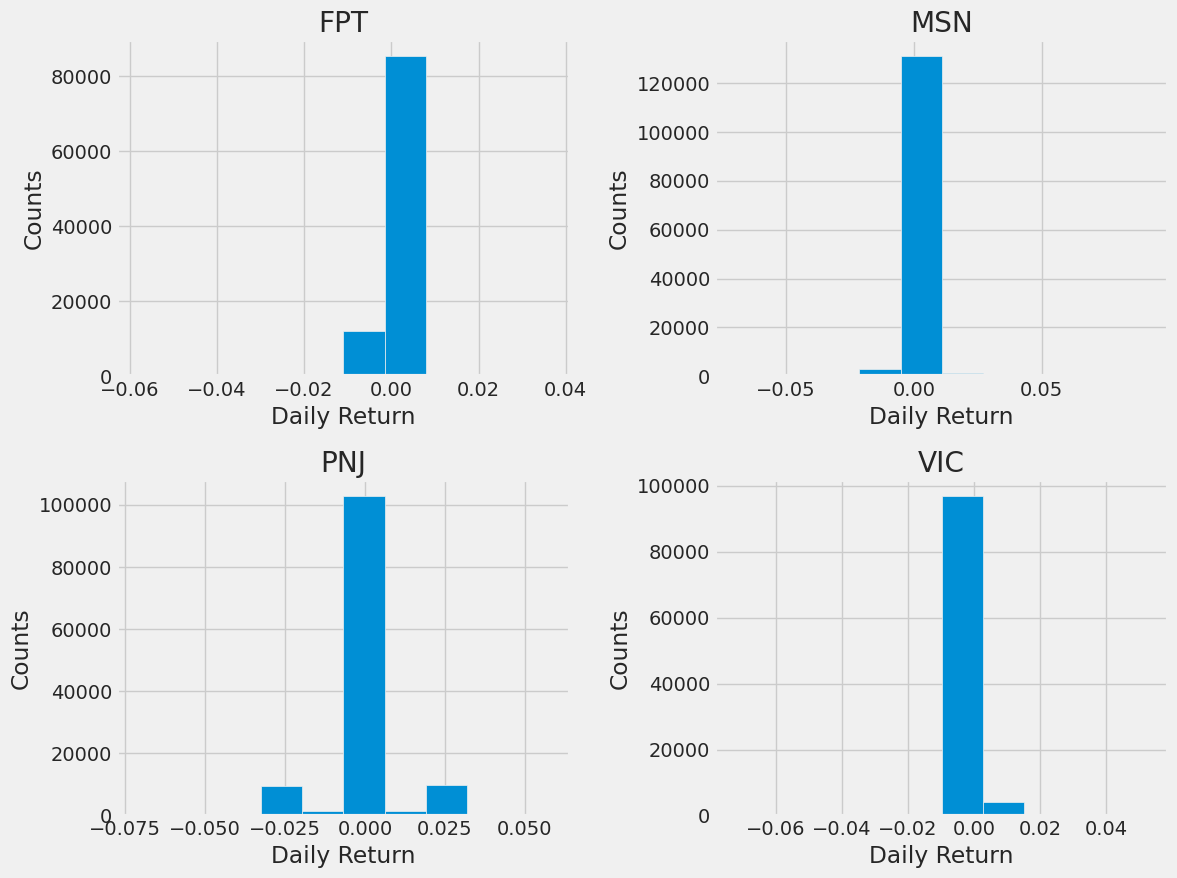

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=10)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')

plt.tight_layout()

# 4. The correlation between different stocks closing prices

In [ ]:
# Calculate the closing prices for the tech stock list into one DataFrame
closing_df = df.pivot(index='Date/Time', columns='Ticker', values='Close')

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
correlation_matrix = tech_rets.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Ticker       FPT       MSN       PNJ       VIC
Ticker                                        
FPT     1.000000 -0.246846 -0.005083 -0.302324
MSN    -0.246846  1.000000  0.335194  0.168345
PNJ    -0.005083  0.335194  1.000000  0.305301
VIC    -0.302324  0.168345  0.305301  1.000000


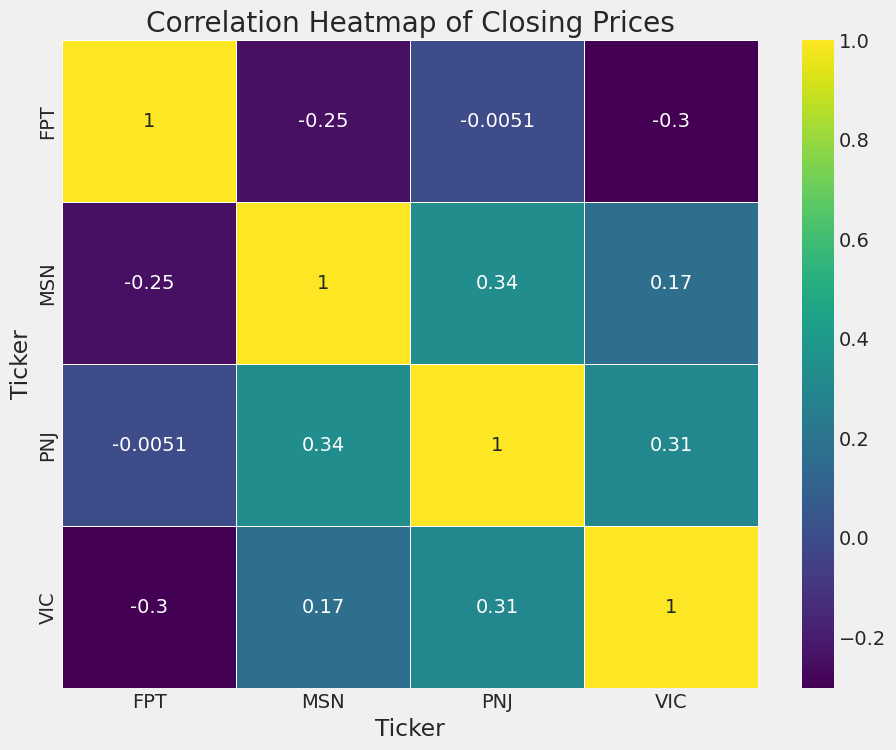

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap of Closing Prices')
plt.show()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

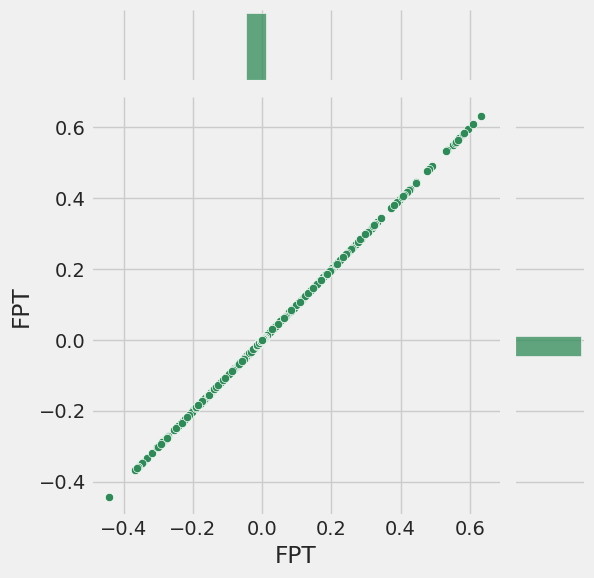

In [ ]:
# Comparing FPT to itself should show a perfectly linear relationship
sns.jointplot(x='FPT', y='FPT', data=tech_rets, kind='scatter', color='seagreen')

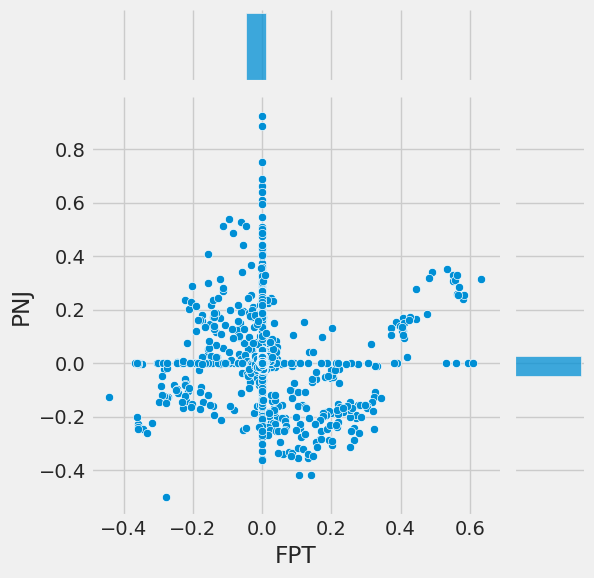

In [ ]:
# We'll use joinplot to compare the daily returns of FPT and PNJ
sns.jointplot(x='FPT', y='PNJ', data=tech_rets, kind='scatter')

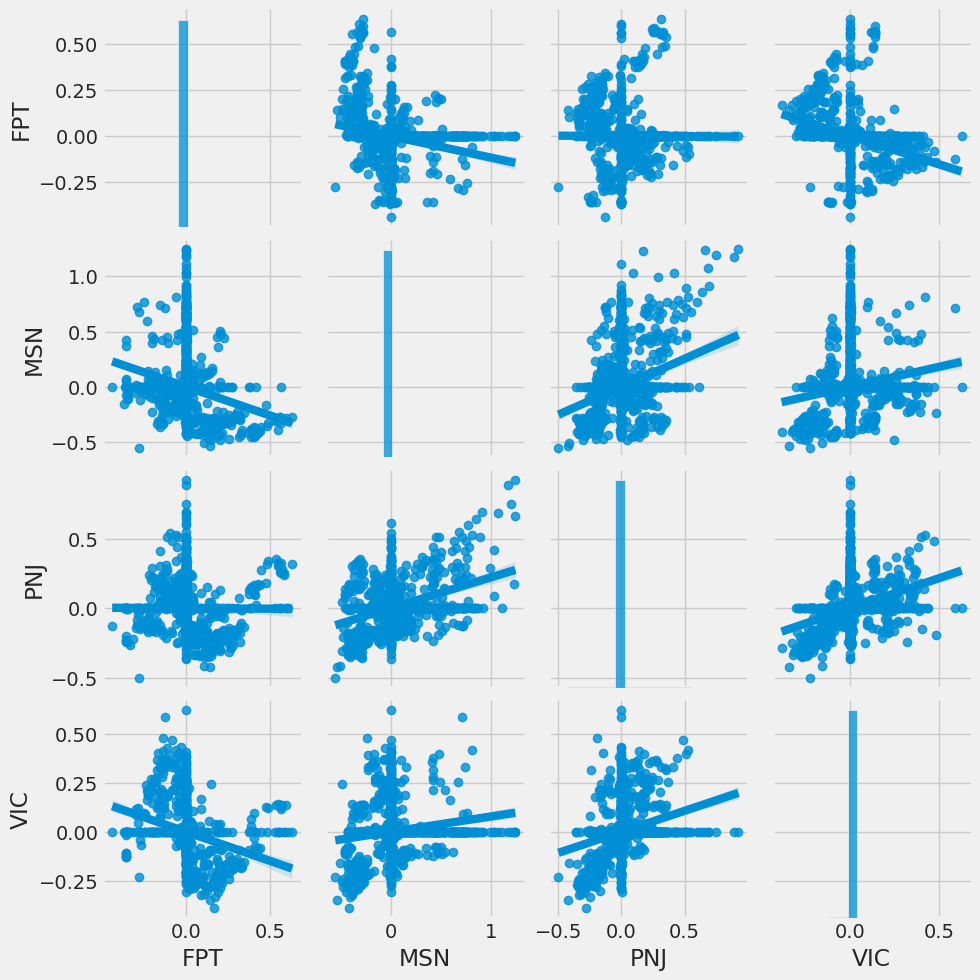

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis  of all the comparisons

sns.pairplot(tech_rets, kind='reg')

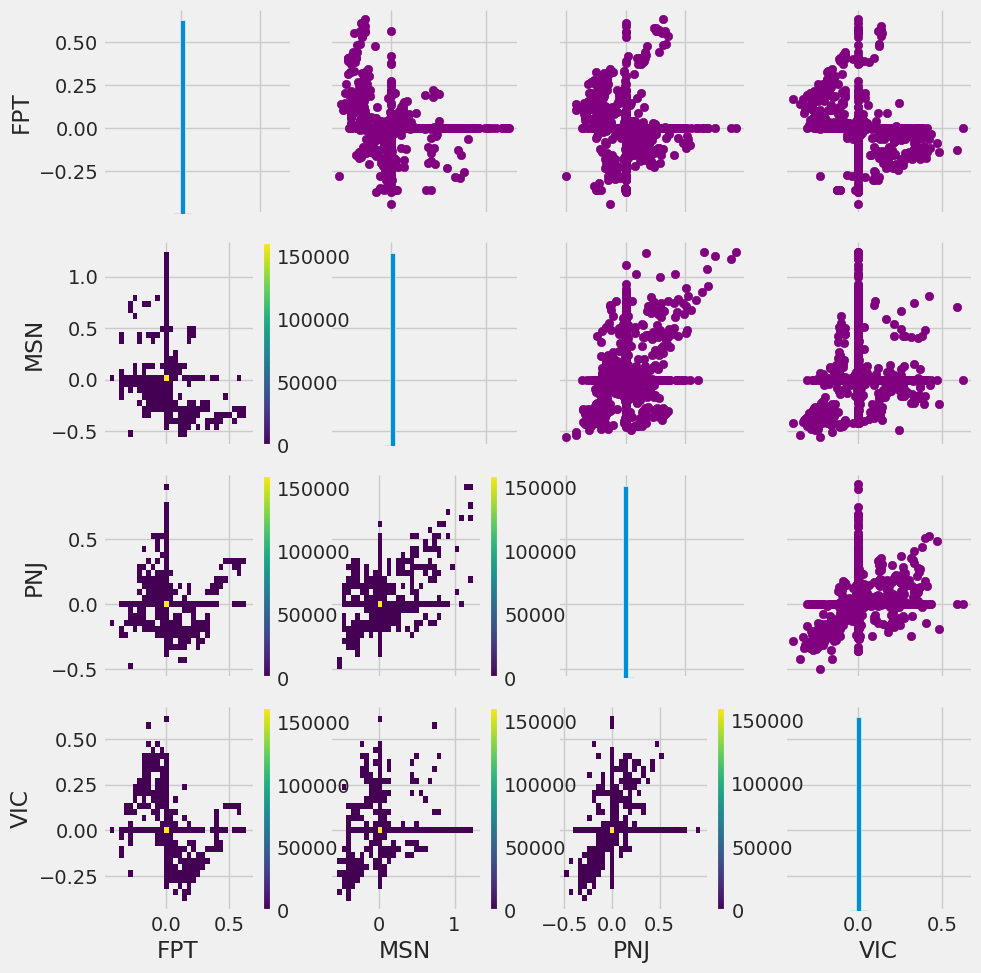

In [ ]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper for scatter plots
return_fig.map_upper(plt.scatter, color='purple')

# Using map_lower for kernel density plots with 'viridis' colormap
return_fig.map_lower(sns.histplot, cmap='viridis', bins=30, cbar=True)

# Finally, we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


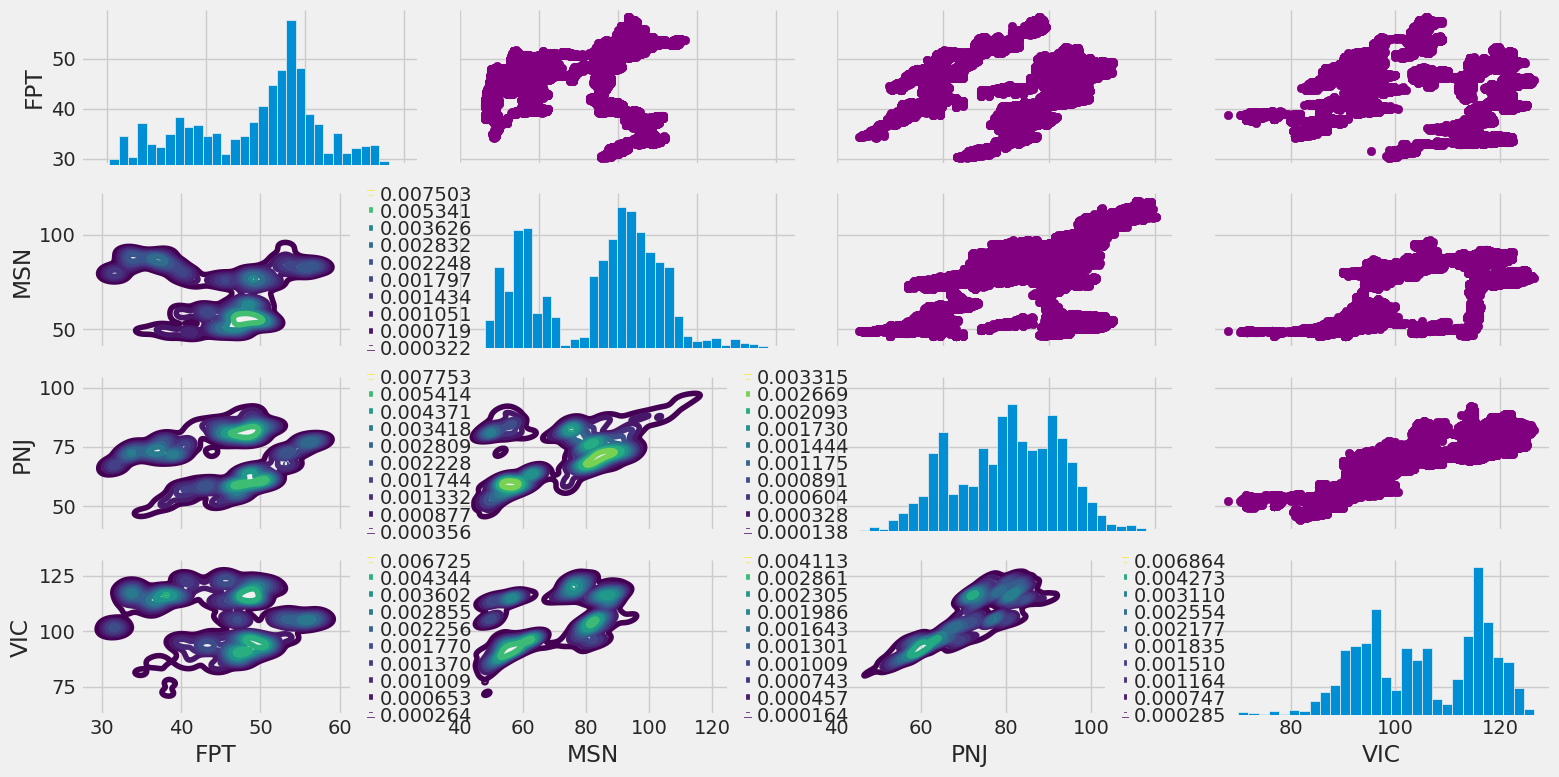

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df, height=2, aspect=2)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='viridis', bins=30, cbar=True)

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between PNJ and VIC.

Text(0.5, 1.0, 'Correlation of stock closing price')

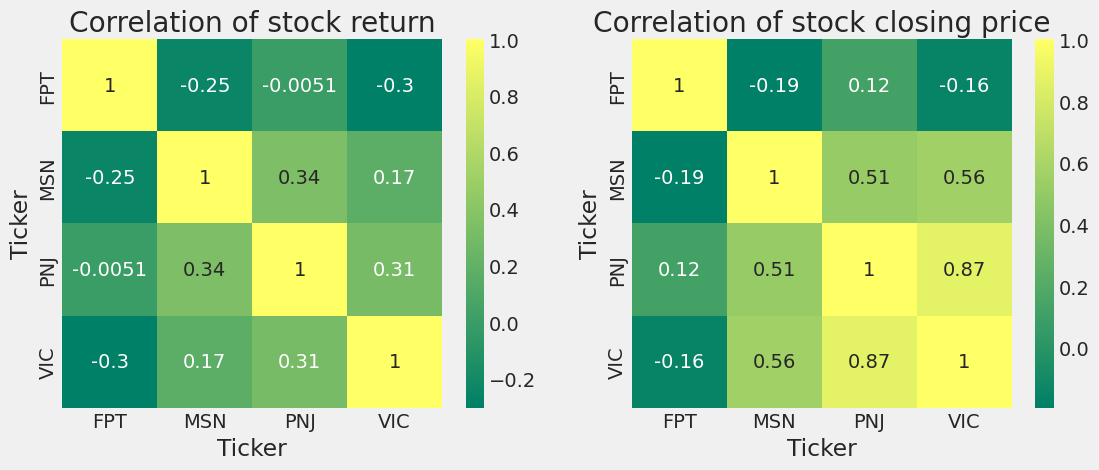

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 5. Put at risk by investing in a particular stock

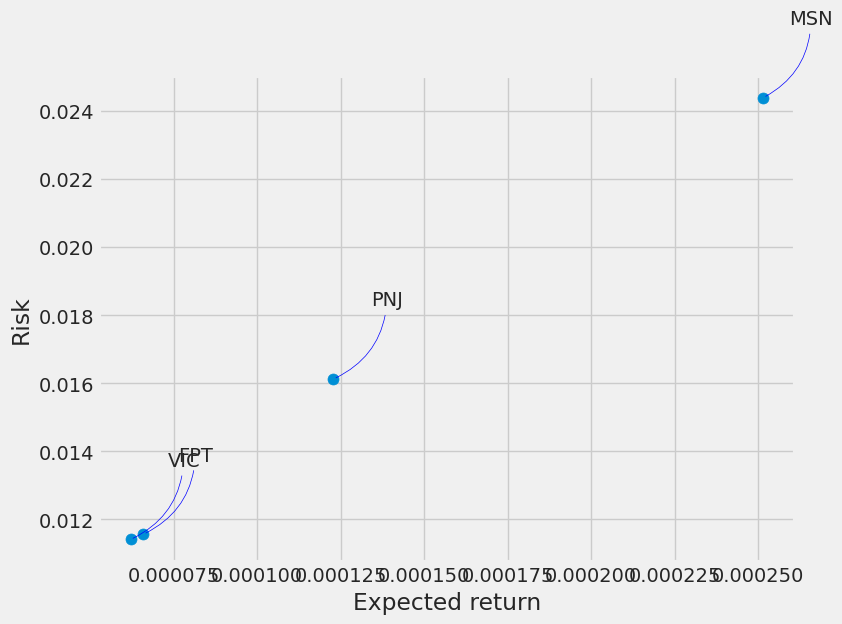

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of FPT inc:

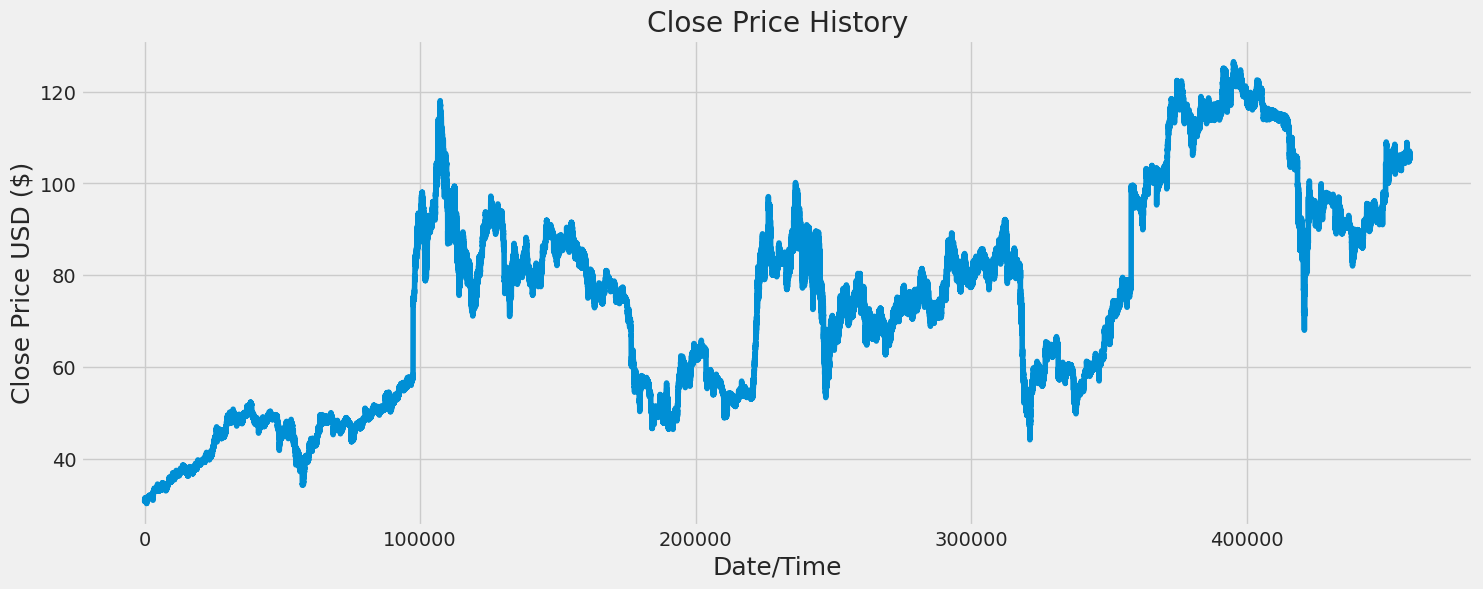

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date/Time', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = FPT.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

92536

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
       0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
       0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
       0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
       0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
       0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
       0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158,
       0.03197158, 0.03055062, 0.03197158, 0.03055062, 0.03197158,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03055062])]
[0.03197158081705154]

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
92476/92476 [==============================] - 4560s 49ms/step - loss: 6.2236e-05
Epoch 2/3
92476/92476 [==============================] - 4575s 49ms/step - loss: 2.1827e-05
Epoch 3/3
92476/92476 [==============================] - 4563s 49ms/step - loss: 1.7250e-05


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

153/153 [==============================] - 6s 33ms/step


0.09223901294078697

<ipython-input-56-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


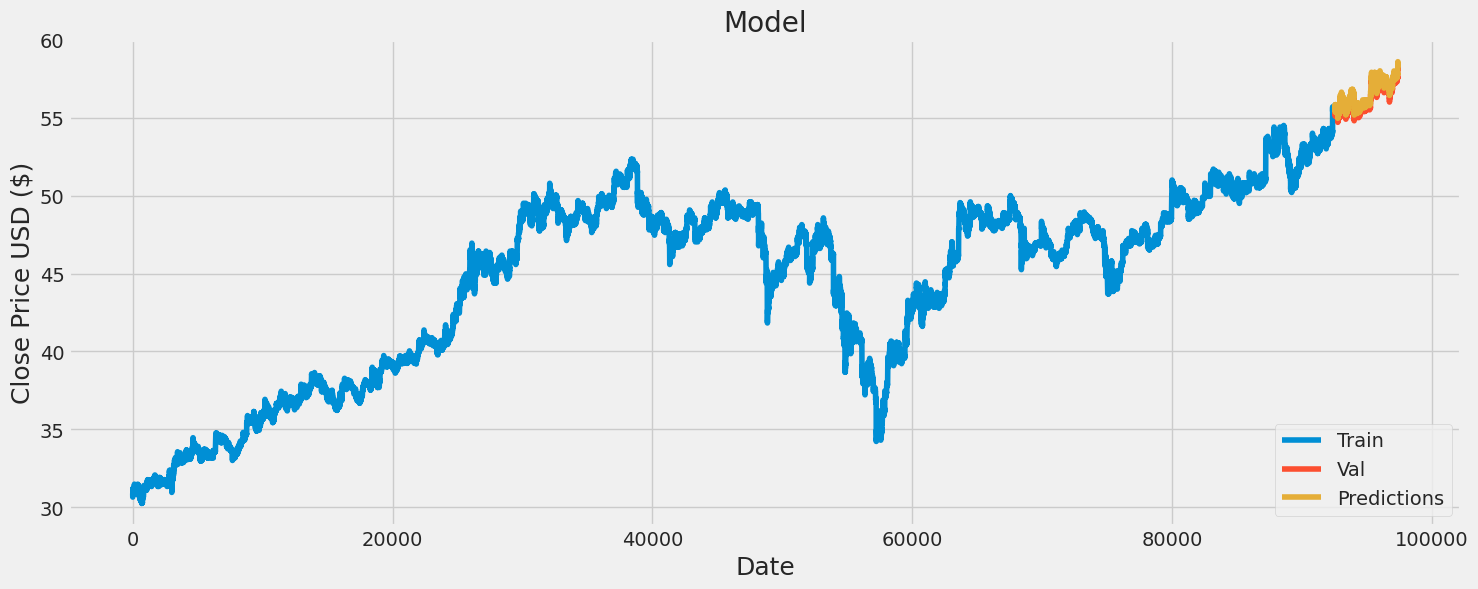

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()